In [2]:
import numpy as np
import pandas as pd 
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('finaldata.csv')
# df = df['','','']

,Unnamed: 0,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24,positive
1,1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,ok noth special charg diamond member hilton de...,0.312,39,positive
2,2,nice rooms not 4* experience hotel monaco seat...,nice room experi hotel monaco seattl good hote...,"['nice', 'rooms', 'not', 'experience', 'hotel'...","['nice', 'rooms', 'experience', 'hotel', 'mona...",nice rooms experience hotel monaco seattle goo...,nice room experi hotel monaco seattl good hote...,nice room experi hotel monaco seattl good hote...,nice room experi monaco seattl good level posi...,0.295,22,positive
3,3,"unique, great stay, wonderful time hotel monac...",uniqu great stay wonder time hotel monaco loca...,"['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time hotel monaco loca...,uniqu great stay wonder time monaco locat shor...,0.456,27,positive
4,4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'went', 'se...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.424,22,positive


In [5]:
corpus = df['cleaned_1'].tolist()
corpus

['nice expens park got good deal stay anniversari arriv late even took advic previou review valet park check quick easi littl disappoint non exist view room room clean nice size bed comfort woke stiff neck high pillow soundproof like heard music room night morn loud bang door open close hear peopl talk hallway mayb noisi neighbor aveda bath product nice goldfish stay nice touch taken advantag stay longer locat great walk distanc shop overal nice experi pay park night',
 'ok noth special charg diamond member hilton decid chain shot th anniversari seattl start book suit paid extra websit descript suit bedroom bathroom standard room took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast got kid embassi suit sit room bathroom bedroom unlik kimpton call suit day stay offer correct fals advertis send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv print

<AxesSubplot:ylabel='sentiment'>

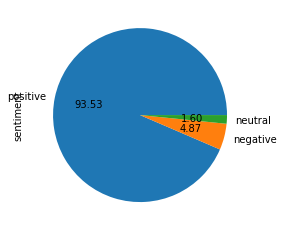

In [6]:
df.sentiment.value_counts().plot.pie(autopct="%.2f")

In [8]:
df['target'] = df['sentiment'].replace({'positive':1,'neutral':0,'negative':-1})
df.head(1)

,Unnamed: 0,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment,target
0,0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expens park got good deal stay hote...,nice expens park got good deal stay anniversar...,0.353,24,positive,1


In [9]:
target=df['target']

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000)
df_tf_idf= vectorizer.fit_transform(corpus).toarray()

In [11]:
import pickle
pickle_out=open('vectorizer.pkl','wb')
pickle.dump(vectorizer,pickle_out)
pickle_out.close()

In [14]:
x = pd.DataFrame(df_tf_idf)
x.head(3)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
target.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [34]:
y = df['target']
# y = pd.DataFrame(target)
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=1)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((14343, 4000), (6148, 4000), (14343,), (6148,))

In [37]:
from imblearn.over_sampling import SMOTE

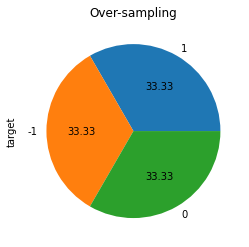

In [38]:
over_sample = SMOTE(sampling_strategy="not majority")
x_train_os, y_train_os = over_sample.fit_resample(x_train, y_train)

ax = y_train_os.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [39]:
print("X train oversampled: ",x_train_os.shape)
print("y train oversampled: ",y_train_os.shape)
print("X test: ",x_test.shape)
print("y test: ",y_test.shape)

X train oversampled:  (40350, 4000)
y train oversampled:  (40350,)
X test:  (6148, 4000)
y test:  (6148,)


In [40]:
x_train = x_train_os
y_train = y_train_os
print(x_train.shape)
print(y_train.shape)

(40350, 4000)
(40350,)


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [45]:
#Gaussian Naive Bayes

classifier_NB = GaussianNB()
classifier_NB.fit(x_train, y_train)

GNB_train=classifier_NB.predict(x_train)
np.mean(GNB_train==y_train)

GNB_test=classifier_NB.predict(x_test)
np.mean(GNB_test==y_test)

GNB_train_acc=round(accuracy_score(y_train,GNB_train),3)
GNB_test_acc=round(accuracy_score(y_test,GNB_test),3)
GNB_f1_score = round(f1_score(y_test,GNB_test,average='macro'),3)

print("Gaussian NB train accuracy: ",GNB_train_acc)
print("Gaussian NB test accuracy: ",GNB_test_acc)
print("Gaussian NB f1 score: ",GNB_f1_score)



Gaussian NB train accuracy:  0.907
Gaussian NB test accuracy:  0.726
Gaussian NB f1 score:  0.352


In [64]:
# print("AUC score: ", roc_auc_score(y_test,GNB_test,multi_class="ovr"))
# print("Train classification report:")
# print(classification_report(y_train,GNB_train))
print("Test classification report:")
print(classification_report(y_test,GNB_test))

Test classification report:
              precision    recall  f1-score   support

          -1       0.10      0.38      0.16       324
           0       0.04      0.12      0.06       108
           1       0.95      0.76      0.84      5716

    accuracy                           0.73      6148
   macro avg       0.36      0.42      0.35      6148
weighted avg       0.89      0.73      0.79      6148



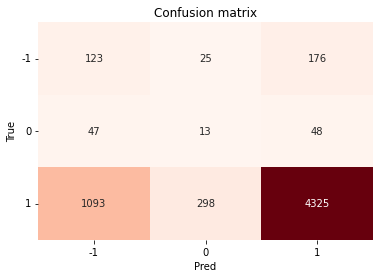

In [48]:
from sklearn import metrics
classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,GNB_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [49]:
#multinomial Naive Bayes
review_classifier_model=MultinomialNB()
review_classifier_model.fit(x_train,y_train)

MNB_train = review_classifier_model.predict(x_train)
np.mean(MNB_train==y_train)

MNB_test=review_classifier_model.predict(x_test)
np.mean(MNB_test==y_test)

multiNB_train_acc = round(accuracy_score(y_train,MNB_train),3)
multiNB_test_acc = round(accuracy_score(y_test,MNB_test),3)
multiNB_f1_score = round(f1_score(y_test,MNB_test,average='macro'),3)

print("MultinomialNB train accuracy score:", multiNB_train_acc)
print("MultinomialNB test accuracy score:", multiNB_test_acc)
print("MultinomialNB f1-score:", multiNB_f1_score)


MultinomialNB train accuracy score: 0.944
MultinomialNB test accuracy score: 0.881
MultinomialNB f1-score: 0.501


In [51]:
# print("Train classification report: ")
# print(classification_report(y_train,MNB_train))
print("Test classification report: ")
print(classification_report(y_test,MNB_test))

Test classification report: 
              precision    recall  f1-score   support

          -1       0.32      0.73      0.44       324
           0       0.10      0.14      0.12       108
           1       0.98      0.90      0.94      5716

    accuracy                           0.88      6148
   macro avg       0.47      0.59      0.50      6148
weighted avg       0.93      0.88      0.90      6148



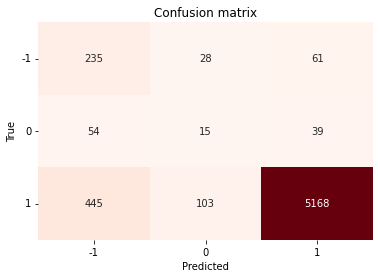

In [52]:
from sklearn import metrics
classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,MNB_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Predicted", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [53]:
#decision tree classifier
dt_model=DecisionTreeClassifier(random_state=1,max_depth=25)
dt_model.fit(x_train,y_train)

dt_train=dt_model.predict(x_train)
np.mean(dt_train==y_train)

dt_test=dt_model.predict(x_test)
np.mean(dt_test==y_test)

dt_train_acc=round(accuracy_score(y_train,dt_train),3)
dt_test_acc=round(accuracy_score(y_test,dt_test),3)
dt_f1_score = round(f1_score(y_test,dt_test,average='macro'),3)

print("Decision Tree Train accuracy: ",dt_train_acc)
print("Decision Tree Test accuracy: ",dt_test_acc)
print("Decision Tree f1 score: ",dt_f1_score)



Decision Tree Train accuracy:  0.965
Decision Tree Test accuracy:  0.84
Decision Tree f1 score:  0.471


In [54]:
# print("Train report: ",classification_report(y_train,dt_train))
print("Test report: ")
print(classification_report(y_test,dt_test))

Test report: 
              precision    recall  f1-score   support

          -1       0.30      0.51      0.38       324
           0       0.07      0.33      0.12       108
           1       0.98      0.87      0.92      5716

    accuracy                           0.84      6148
   macro avg       0.45      0.57      0.47      6148
weighted avg       0.92      0.84      0.88      6148



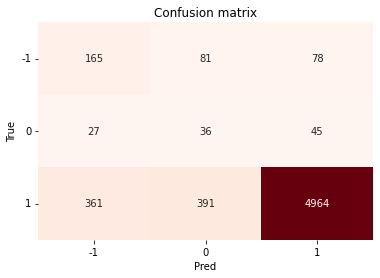

In [55]:
from sklearn import metrics
classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,dt_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [56]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=1,max_features=100)
rf_model.fit(x_train,y_train)

rf_train=rf_model.predict(x_train)
np.mean(rf_train==y_train)

rf_test=rf_model.predict(x_test)
np.mean(rf_test==y_test)

rf_train_acc=round(accuracy_score(y_train,rf_train),3)
rf_test_acc=round(accuracy_score(y_test,rf_test),3)
rf_f1_score = round(f1_score(y_test,rf_test,average='macro'),3)

print("Random Forest Train accuracy: ",rf_train_acc)
print("Random Forest Test accuracy: ",rf_test_acc)
print("Random Forest f1 score: ",rf_f1_score)



Random Forest Train accuracy:  1.0
Random Forest Test accuracy:  0.939
Random Forest f1 score:  0.497


In [57]:
# print("Train report: ",classification_report(y_train,rf_train))
print("Test report: ")
print(classification_report(y_test,rf_test))

Test report: 
              precision    recall  f1-score   support

          -1       0.61      0.40      0.49       324
           0       0.25      0.02      0.03       108
           1       0.95      0.99      0.97      5716

    accuracy                           0.94      6148
   macro avg       0.60      0.47      0.50      6148
weighted avg       0.92      0.94      0.93      6148



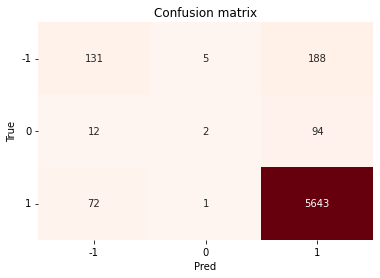

In [58]:
from sklearn import metrics
classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,rf_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [59]:
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier(random_state=6)
ada_model.fit(x_train,y_train)

ada_train=ada_model.predict(x_train)
np.mean(ada_train==y_train)

ada_test=ada_model.predict(x_test)
np.mean(ada_test==y_test)

ada_train_acc=round(accuracy_score(y_train,ada_train),3)
ada_test_acc=round(accuracy_score(y_test,ada_test),3)
ada_f1_score = round(f1_score(y_test,ada_test,average='macro'),3)

print("AdaBoost train accuracy: ", ada_train_acc)
print("AdaBoost test accuracy: ", ada_test_acc)
print("AdaBoost f1 score: ", ada_f1_score)

AdaBoost train accuracy:  0.82
AdaBoost test accuracy:  0.862
AdaBoost f1 score:  0.503


In [60]:
# print("Train report:",classification_report(y_train,ada_train))
print("Test report:")
print(classification_report(y_test,ada_test))

Test report:
              precision    recall  f1-score   support

          -1       0.43      0.37      0.40       324
           0       0.10      0.65      0.17       108
           1       0.99      0.89      0.94      5716

    accuracy                           0.86      6148
   macro avg       0.51      0.64      0.50      6148
weighted avg       0.95      0.86      0.90      6148



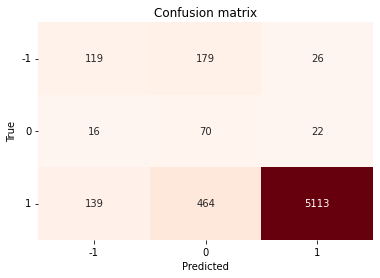

In [61]:
from sklearn import metrics
classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,ada_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Predicted", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

In [62]:
data=[['Gaussian NB',GNB_test_acc,GNB_f1_score],['Multinomial NB',multiNB_test_acc,multiNB_f1_score],
         ['Decision Tree',dt_test_acc,dt_f1_score],['Random Forest',rf_test_acc,rf_f1_score],
         ['Ada Boost',ada_test_acc,ada_f1_score]]

summary=pd.DataFrame(data,columns=['Model','test_accuracy','F1_score'])
summary

,Model,test_accuracy,F1_score
0,Gaussian NB,0.726,0.352
1,Multinomial NB,0.881,0.501
2,Decision Tree,0.840,0.471
3,Random Forest,0.939,0.497
4,Ada Boost,0.862,0.503


### Prediction

In [66]:
### Prediction

In [65]:
import streamlit as st

import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
wordnet=WordNetLemmatizer()
ps = PorterStemmer()
cv = CountVectorizer()
from wordcloud import WordCloud, STOPWORDS
from rake_nltk import Rake

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\89bal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [69]:
def clean_text(a):
    print("Number of words in Review:", len(a.split()))
    text=re.sub('[^A-za-z0-9]',' ',a)
    text=text.lower()
    text=text.split(' ')
    text = [wordnet.lemmatize(word) for word in text if word not in (stopwords.words('english'))]
    text = ' '.join(text)
    top2_words = get_top_n2_words([text],n=5) 
    df = pd.DataFrame(top2_words)
    df.columns=["Bi-gram", "Freq"]
    print(df)
   
    return text

In [70]:
def expression_check(prediction_input):
    if prediction_input == -1:
        print("Negative")
    elif prediction_input == 1:
        print("Positive")
    else:
        print("Neutral")

In [74]:
def sentiment_predictor(input):
    input = clean_text(input)
    transformed_input = vectorizer.transform([input])
    prediction = rf_model.predict(transformed_input)
    expression_check(prediction)
    r = Rake(language='english', stopwords=STOPWORDS)
    r.extract_keywords_from_text(input)
    r.get_ranked_phrases()
    print(r.get_ranked_phrases())

In [78]:
negative_review_test= ("This is hotel is the worst one....Staff are terrible....front desk guys were worst and indifferent..i went with family and they have no consideration...rooms are worst quality...AC is broken and beds have bugs in it...gloomy ambience...it is a mess in the middle of a messy location...only reason to book is its proximity to NDLS station...otherwise guys don't book this hotel at all...even the wifi is worst...")

In [79]:
sentiment_predictor(negative_review_test)

Number of words in Review: 65
          Bi-gram      Freq
0     hotel worst  0.164399
1       worst one  0.164399
2       one staff  0.164399
3  staff terrible  0.164399
4  terrible front  0.164399
Negative
['hotel worst one staff terrible front desk guy worst indifferent went family consideration room worst quality ac broken bed bug gloomy ambience mess middle messy location reason book proximity ndls station', 'guy book hotel even wifi worst']


In [80]:
positive_review_test = ("Our room was enormous, with a nice view of the river. It was 105 degrees (Fahrenheit) when we stayed but every thing was kept cool and pleasant Very centrally located. Staff were very welcoming and helpful.")

In [81]:
sentiment_predictor(positive_review_test)

Number of words in Review: 36
         Bi-gram      Freq
0  room enormous  0.235702
1  enormous nice  0.235702
2      nice view  0.235702
3     view river  0.235702
4      river 105  0.235702
Positive
['room enormous nice view river 105 degree fahrenheit stayed every thing kept cool pleasant centrally located staff welcoming helpful']


In [82]:
import pickle
from pickle import load
from pickle import dump

In [84]:
pickle_out=open('rf_model.pkl','wb')
pickle.dump(rf_model,pickle_out)
pickle_out.close()